In [33]:
""" Importing libraries """
from ovito.io import *
from ovito.modifiers import *
import numpy as np
import matplotlib.pyplot as plt

In [34]:
!ls

annealed_Co-Fe-Ni.data	      annealing_cooling.in
annealed_system_10.dump       annealing_cooling.in.run
annealed_system_1.dump	      annealing_heating.in
annealed_system_1.npz	      annealing_heating.in.run
annealed_system_4.dump	      annealing.in.init
annealed_system_4.npz	      annealing.in.settings
annealed_system_5.dump	      common-neigh.ipynb
annealed_system_5.npz	      plot_analysis.py
annealed_system_5_test.dump   temperature_10.dat
annealed_system_5_test.npz    temperature_1.dat
annealed_system_8.dump	      temperature_4.dat
annealed_system_8.npz	      temperature_5.dat
annealed_system.dump	      temperature_8.dat
annealed_system_heating.dump  temperature_heating.dat


In [35]:
fn = 'annealed_system_10'

In [36]:
""" Loading input file into an Ovito pipeline """
pipeline_wetting = import_file(fn+'.dump')

In [37]:
""" Append modifiers to the pipeline (e.g. CNA, RDF, ...) """
pipeline_wetting.modifiers.append(CommonNeighborAnalysisModifier())
pipeline_wetting.modifiers.append(CoordinationAnalysisModifier(cutoff=10.0,partial=True))

In [38]:
f_bcc_vec = []
f_fcc_vec = []
f_hcp_vec = []
f_amo_vec = []

In [39]:
""" Loop over simulation frames and do something """
n = 0
for data in pipeline_wetting.frames:
    
    n += 1
    print('frame # ',n,'/',pipeline_wetting.num_frames)
    
    n_bcc = data.attributes['CommonNeighborAnalysis.counts.BCC']
    f_bcc = n_bcc / data.particles.count
    f_bcc_vec.append(f_bcc)
    
    n_fcc = data.attributes['CommonNeighborAnalysis.counts.FCC']
    f_fcc = n_fcc / data.particles.count
    f_fcc_vec.append(f_fcc)
    
    n_hcp = data.attributes['CommonNeighborAnalysis.counts.HCP']
    f_hcp = n_hcp / data.particles.count
    f_hcp_vec.append(f_hcp)
    
    f_amo = 1-(f_bcc+f_fcc+f_hcp)
    f_amo_vec.append(f_amo)
    
    if f_amo<0 :
        print("WARNING: negative fraction of amorphous phase!")

frame #  1 / 112
frame #  2 / 112
frame #  3 / 112
frame #  4 / 112
frame #  5 / 112
frame #  6 / 112
frame #  7 / 112
frame #  8 / 112
frame #  9 / 112
frame #  10 / 112
frame #  11 / 112
frame #  12 / 112
frame #  13 / 112
frame #  14 / 112
frame #  15 / 112
frame #  16 / 112
frame #  17 / 112
frame #  18 / 112
frame #  19 / 112
frame #  20 / 112
frame #  21 / 112
frame #  22 / 112
frame #  23 / 112
frame #  24 / 112
frame #  25 / 112
frame #  26 / 112
frame #  27 / 112
frame #  28 / 112
frame #  29 / 112
frame #  30 / 112
frame #  31 / 112
frame #  32 / 112
frame #  33 / 112
frame #  34 / 112
frame #  35 / 112
frame #  36 / 112
frame #  37 / 112
frame #  38 / 112
frame #  39 / 112
frame #  40 / 112
frame #  41 / 112
frame #  42 / 112
frame #  43 / 112
frame #  44 / 112
frame #  45 / 112
frame #  46 / 112
frame #  47 / 112
frame #  48 / 112
frame #  49 / 112
frame #  50 / 112
frame #  51 / 112
frame #  52 / 112
frame #  53 / 112
frame #  54 / 112
frame #  55 / 112
frame #  56 / 112
f

In [40]:
n_type1 = np.count_nonzero(data.particles['Particle Type'][...]==1)
n_type2 = np.count_nonzero(data.particles['Particle Type'][...]==2)
n_type3 = np.count_nonzero(data.particles['Particle Type'][...]==3)

In [41]:
print(n_type1/(n_type1+n_type2+n_type3))
print(n_type2/(n_type1+n_type2+n_type3))
print(n_type3/(n_type1+n_type2+n_type3))

0.33311111111111114
0.3343703703703704
0.3325185185185185


In [42]:
dt = 0.1 # [ns]
t = dt*np.arange(pipeline_wetting.num_frames)

<IPython.core.display.Javascript object>


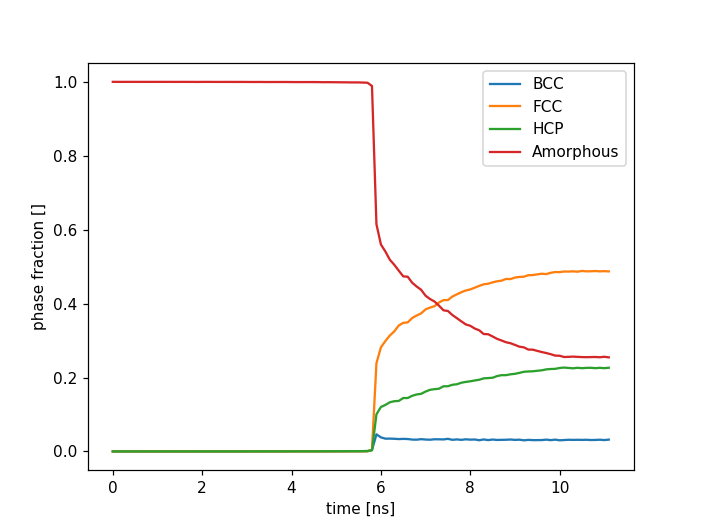

In [43]:
%matplotlib notebook
plt.plot(t,f_bcc_vec,label='BCC')
plt.plot(t,f_fcc_vec,label='FCC')
plt.plot(t,f_hcp_vec,label='HCP')
plt.plot(t,f_amo_vec,label='Amorphous')
plt.xlabel('time [ns]')
plt.ylabel('phase fraction []')
plt.legend()
plt.show()

In [44]:
np.savez(fn+'.npz',t=t,f_bcc_vec=f_bcc_vec,f_fcc_vec=f_fcc_vec,f_hcp_vec=f_hcp_vec,f_amo_vec=f_amo_vec)